In [2]:
#Razleen Kakar
#ML for Capstone Project

#import libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from time import time
from itertools import product

In [11]:
# import Teams Data
data = pandas.read_csv('TeamData.csv')  #This needs to be updated to refelct the database created.
pandas.set_option('display.max_columns', 100)
currentTeams = (data[(data['To'] == '2020-21')]) #Filter current teams
teamsData = currentTeams[["Franchise", "G","W","L","Yrs", "W/L%", "Plyfs", "Div", "Conf", "Champ"]] #Display needed columns
teamsData = teamsData.dropna(axis=0) #Drop missing data
teamsData

,Franchise,G,W,L,Yrs,W/L%,Plyfs,Div,Conf,Champ
0,Atlanta Hawks,5653,2780,2873,72,0.492,46,11,0,1
1,Atlanta Hawks,4235,2082,2153,53,0.492,33,5,0,0
5,Boston Celtics,5830,3443,2387,75,0.591,57,31,9,17
6,Brooklyn Nets,4329,1881,2448,54,0.435,28,5,2,2
7,Brooklyn Nets,681,299,382,9,0.439,5,0,0,0
12,Charlotte Hornets,2428,1066,1362,31,0.439,10,0,0,0
13,Charlotte Hornets,508,231,277,7,0.455,1,0,0,0
16,Chicago Bulls,4394,2242,2152,55,0.510,35,9,6,6
17,Cleveland Cavaliers,4069,1880,2189,51,0.462,22,7,5,1
18,Dallas Mavericks,3257,1631,1626,41,0.501,22,3,2,1


In [17]:
idx = teamsData.groupby(['Franchise'])['Yrs'].transform(max) == teamsData['Yrs']
idx

0      True
1     False
5      True
6      True
7     False
12     True
13    False
16     True
17     True
18     True
19     True
20    False
23     True
24    False
26     True
27    False
30     True
31    False
33     True
34    False
36     True
37    False
40     True
41    False
43     True
44    False
46     True
47     True
48     True
49     True
50    False
53     True
54     True
55    False
57     True
58     True
59    False
61     True
62     True
63     True
64    False
69     True
70    False
74     True
75     True
76    False
78     True
79    False
Name: Yrs, dtype: bool

In [7]:
#Create KNN Regression

data = teamsData

def regression_kNN(new_example,train_data,k):
    
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
    (new_example['Franchise']-train_data_copy['Franchise'])**2  #Predictor Var.
    +(new_example['L']-train_data_copy['L'])**2
    +(new_example['W/L%']-train_data_copy['W/L%'])**2
    +(new_example['Plyfs']-train_data_copy['Plyfs'])**2
    +(new_example['Div']-train_data_copy['Div'])**2
    +(new_example['Conf']-train_data_copy['Conf'])**2
    +(new_example['Champ']-train_data_copy['Champ'])**2)
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    prediction = sorted_data.iloc[0:k]['W'].mean()  #target feature
    return prediction

def regression_all_kNN(test_data,train_data,k):
    return test_data.apply(regression_kNN,args=(train_data,k),axis=1)

def Rsquared(actual,predicted):
    ybar = actual.mean()
    SSres = ((actual-predicted)**2)
    res = SSres.sum()
    SStot = ((actual-ybar)**2)
    tot = SStot.sum()
    Rsquared = 1-(res/tot)
    return Rsquared

In [8]:
shuffled_data = data.sample(frac=1)

test_data = shuffled_data.iloc[0:200]
train_data = shuffled_data.iloc[200:]

predictions = regression_all_kNN(test_data,train_data,5)
print(test_data['W'])
print(predictions)
Rsquared(test_data['W'],predictions)

55     596
1     2082
24    2449
48     987
7      299
63    2606
49     687
46    1355
74     972
58    2922
43     841
19    2180
78    2166
31    2161
61    2242
6     1881
75    2035
44     740
5     3443
53    2817
27    1918
41    2952
34    1804
57    1204
76    1874
18    1631
47    2206
50     268
20    1767
54    2341
64    1200
16    2242
26    2806
30    2280
0     2780
37    1238
62    2187
13     231
70    2211
23    2762
12    1066
33    2231
36    1683
40    3409
69    2589
79     788
59    2346
17    1880
Name: W, dtype: int64
55   NaN
1    NaN
24   NaN
48   NaN
7    NaN
63   NaN
49   NaN
46   NaN
74   NaN
58   NaN
43   NaN
19   NaN
78   NaN
31   NaN
61   NaN
6    NaN
75   NaN
44   NaN
5    NaN
53   NaN
27   NaN
41   NaN
34   NaN
57   NaN
76   NaN
18   NaN
47   NaN
50   NaN
20   NaN
54   NaN
64   NaN
16   NaN
26   NaN
30   NaN
0    NaN
37   NaN
62   NaN
13   NaN
70   NaN
23   NaN
12   NaN
33   NaN
36   NaN
40   NaN
69   NaN
79   NaN
59   NaN
17   NaN
dtype: float64


1.0

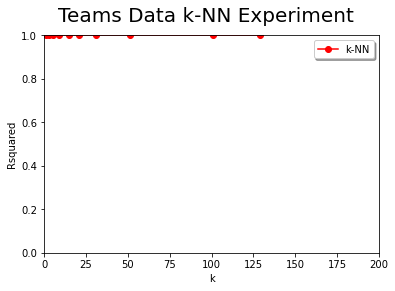

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


data = teamsData

shuffled_data = data.sample(frac=1)

test_data = shuffled_data.iloc[0:200]
train_data = shuffled_data.iloc[200:]

#Run this for several different splits of the data
#-- varying the number of elements in the testing data and/or different values for the "random_state". 
k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_r2 = []

for k in k_vals:

    predictions = regression_all_kNN(test_data,train_data,k)
    current_Rsquared = Rsquared(test_data['W'],predictions)
    kNN_r2.append(current_Rsquared)


plt.suptitle('Teams Data k-NN Experiment',fontsize=20)
plt.xlabel('k')
plt.ylabel('Rsquared')
plt.plot(k_vals,kNN_r2,'ro-',label='k-NN')
plt.legend(loc='upper right', shadow=True)
plt.axis([0,200,0,1])
plt.show()